#**Introduction**

This project focuses on analyzing the world population dataset to gain deep
insights into demographic trends, population growth, and patterns across different regions. Population dynamics play a crucial role in shaping global policies, resource allocation, and economic planning. By leveraging this dataset, we aim to explore the factors influencing population growth and provide a comprehensive understanding of the changes occurring across countries, continents, and the world as a whole.

The analysis is organized into three distinct sections:

**India-Specific Analysis**: A focused exploration of population trends in India, considering its significance as one of the most populous countries in the world.

**Continental Analysis**: A comparative study of population patterns across continents, highlighting regional disparities and growth trends.

**Global Analysis**: An overarching view of worldwide population dynamics to identify macro-level patterns and their potential implications.

Through this structured approach, the project addresses several key questions:

**Which countries or regions contribute the most to the global population?**

**How has the population evolved over the decades, and what are the notable growth trends?**

**What similarities and differences exist in population growth patterns across continents?**

**How does India's population trajectory compare to global and regional trends?**

The analysis employs advanced statistical tools and visually engaging data visualization techniques to uncover these insights. It aims to make the findings both intuitive and accessible to a diverse audience. Furthermore, the project provides actionable observations that may assist policymakers, researchers, and other stakeholders in understanding the pressing challenges and opportunities tied to population dynamics.

By the end of this project, we aspire to present a clear and insightful narrative about how populations have grown and shifted globally, regionally, and in India specifically, and what this means for the future of our interconnected world.

In [1]:
!kaggle datasets download -d iamsouravbanerjee/world-population-dataset


Dataset URL: https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset
License(s): other
  0% 0.00/15.7k [00:00<?, ?B/s]
100% 15.7k/15.7k [00:00<00:00, 22.1MB/s]


In [2]:
!unzip world-population-dataset.zip

Archive:  world-population-dataset.zip
  inflating: world_population.csv    


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [4]:
df = pd.read_csv('world_population.csv')
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


#**Basic information about the dataset**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [6]:
df.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,117.500000,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


#**Population analysis of India**

**Population trends in India 2000-2022**

In [7]:
india_data = df[df['Country/Territory'] == 'India']

india_population = pd.DataFrame({
    'Year': ['2000', '2010', '2015', '2020', '2022'],
    'Population': [india_data['2000 Population'].values[0],
                   india_data['2010 Population'].values[0],
                   india_data['2015 Population'].values[0],
                   india_data['2020 Population'].values[0],
                   india_data['2022 Population'].values[0]]
})

fig = px.line(india_population,
              x='Year',
              y='Population',
              title='Population Trend in India from 2000 to 2022',
              labels={'Year': 'Year', 'Population': 'Population'},
              markers=True)
fig.show()

**Growth rate of India's population over different decades**

In [8]:
df_pr = df[df['Country/Territory'] == 'India']

india_population = pd.DataFrame({
    'Year': ['1970','1980','1990','2000','2010','2015','2020','2022'],
    'Population': [df_pr['1970 Population'].values[0],df_pr['1980 Population'].values[0],
                   df_pr['1990 Population'].values[0],df_pr['2000 Population'].values[0],
                   df_pr['2010 Population'].values[0],df_pr['2015 Population'].values[0],
                   df_pr['2020 Population'].values[0],df_pr['2022 Population'].values[0]]
 })

growth_rate = [0]

for i in range(1, len(india_population)):
    growth = (india_population['Population'].iloc[i] - india_population['Population'].iloc[i-1]) / india_population['Population'].iloc[i-1] * 100
    growth_rate.append(growth)

india_population['Growth Rate'] = growth_rate

fig = px.line(india_population,x='Year',y='Growth Rate',title='Growth rate of India\'s population over different decades',markers='True')
fig.show()

**India’s population density compare to other countries**

In [9]:
df_pr = df[['Country/Territory', 'Area (km²)', 'Density (per km²)']]

fig = px.scatter(df_pr,
                 x='Area (km²)',
                 y='Density (per km²)',
                 hover_name='Country/Territory',
                 title="Population Density vs Area Size for Different Countries",
                 labels={'Density (per km²)': 'Population Density (per km²)', 'Area (km²)': 'Area Size (km²)'},
                 size='Density (per km²)', color='Density (per km²)')

#Highlighting India
fig.add_annotation(x=df_pr[df_pr['Country/Territory'] == 'India']['Area (km²)'].values[0],
                   y=df_pr[df_pr['Country/Territory'] == 'India']['Density (per km²)'].values[0],
                   text="India",
                   showarrow=True, arrowhead=1, ax=50, ay=-50)

fig.show()

#**Population analysis of Continents**

 **Population distributed across the continents in 2022**

In [10]:
df_plot = df[['Country/Territory', 'Continent', '2022 Population']]

# Group by continent to get the total population per continent
continent_population = df_plot.groupby('Continent')['2022 Population'].sum().reset_index()

# Stacked bar chart
fig = px.bar(df_plot,
             x='Continent',
             y='2022 Population',
             color='Country/Territory',
             title="Population Distribution Across Continents in 2022",
             labels={'2022 Population': 'Population (in billions)', 'Continent': 'Continent'},
             text_auto=True)

# Show the figure
fig.show()

**Continent has the highest population density**

In [11]:
df_pr = df.groupby('Continent')['Density (per km²)'].sum().reset_index()

fig = px.bar(df_pr,x='Continent',y='Density (per km²)',title='Continent has the highest population density')
fig.show()

**Correlation between growth rate, area, and population by continent**

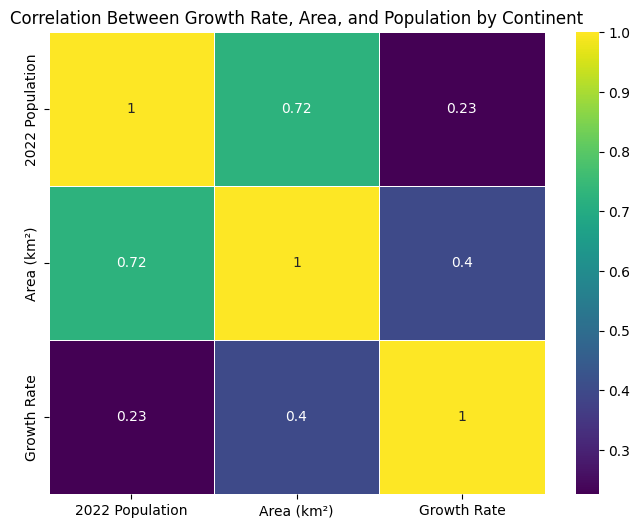

In [12]:
df_corr = df[['Continent', '2022 Population', 'Area (km²)', 'Growth Rate']]

# Group by continent and aggregate data for correlation analysis
df_grouped = df_corr.groupby('Continent').agg({
    '2022 Population': 'sum',
    'Area (km²)': 'sum',
    'Growth Rate': 'mean'
}).reset_index()

# Calculate the correlation matrix for the grouped data
corr_matrix = df_grouped[['2022 Population', 'Area (km²)', 'Growth Rate']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Between Growth Rate, Area, and Population by Continent')
plt.show()

**Relationship between population growth rate and population size by continent**

In [13]:
df_pr = df.groupby('Continent').agg({
    '2022 Population': 'sum',
    'Area (km²)': 'sum',
    'Growth Rate': 'mean'
}).reset_index()

fig = px.scatter(df_pr,x='2022 Population',y='Growth Rate',color='Continent',title='Relationship between population growth rate and population size by continent')
fig.show()

**Population distribution of countries within a continent variation**

In [14]:
df_pr = df[df['Continent'] == 'Asia'][['Country/Territory','2022 Population']]
# Filter the DataFrame based on the condition and then select the '2022 Population' column.
fig = px.box(df_pr,y='2022 Population',title='Population distribution of countries within a continent variation')
fig.show()

**Percentage distribution of the world’s population continentwise**

In [15]:
df_pr = df.groupby('Continent')['2022 Population'].sum().reset_index()
df_pr

fig = px.pie(df_pr,values='2022 Population',names='Continent',title='Percentage distribution of the world’s population continentwise')
fig.update_layout(width=900,height=600)
fig.show()

**Correlation between growth rate, area, and population by continent**

In [16]:
df_pr = df.groupby('Continent').agg({
        '2022 Population':'sum',
        'Area (km²)':'sum',
        'Growth Rate':'mean'
        }).reset_index()

df_pr= df_pr.drop('Continent',axis = 1)

df_pr.corr()

fig = px.imshow(df_pr.corr(),title='Correlation between growth rate, area, and population by continent',
                         labels=dict(x='Variables', y='Variables', color='Correlation Coefficient'),)
fig.show()

#**Population analysis of World**

In [17]:
df_pr = df[['Country/Territory','2022 Population']]
df_pr.sort_values(by='2022 Population',ascending=False,inplace=True)
px.bar(df_pr.head(10),x='Country/Territory',y='2022 Population',title='Top 10 Population Country')

<ipython-input-17-9c1642cddf3c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
px.bar(df_pr.tail(10),x='Country/Territory',y='2022 Population',title='Bottom 10 Population Country')

**World population percentage vary among the top 5 most populous countries**

In [19]:
df_pr = df[['Country/Territory','2022 Population']]
df_pr.sort_values(by='2022 Population',ascending=False,inplace=True)
fig = px.pie(df_pr.head(5),values='2022 Population',names='Country/Territory',title='World population percentage vary among the top 5 most populous countries')
fig.show()

<ipython-input-19-1e600b03d782>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Relationship between area size and population for different countries**

In [20]:
df_pr = df[['Country/Territory','2022 Population','Area (km²)']]

fig = px.scatter(
    df_pr,
    x='2022 Population',
    y='Area (km²)',
    color='Country/Territory',
    size='Area (km²)',  # Changed 'Area' to 'Area (km²)'
    size_max=20,
    hover_name='Country/Territory',
    title='Relationship between Area Size and Population (2022)',
    labels={
        '2022 Population': 'Population (in billions)',
        'Area (km²)': 'Area (in km²)',
    }
)

fig.show()

**Impact of geographical factors like area and density on the country growth**

In [21]:
df_pr = df[['Country/Territory', 'Area (km²)', 'Density (per km²)', 'Growth Rate']]


fig = px.scatter_3d(df_pr, x='Area (km²)', y='Density (per km²)', z='Growth Rate',
                    color='Country/Territory',
                    title='Impact of Geographical Factors like Area and Density on Country Growth')

fig.update_layout(width=1000, height=800)  # Customize width and height as needed
fig.show()

**Correlation between different population metrics**

In [22]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_pr=df_numeric.corr()
df_pr.drop('Rank',axis=0,inplace=True)
df_pr.drop('Rank',axis=1,inplace=True)
df_pr.drop('World Population Percentage',axis=0,inplace=True)
df_pr.drop('World Population Percentage',axis=1,inplace=True)
fig = px.imshow(df_pr,title='Correlation between different population metrics',
                         labels=dict(x='Variables', y='Variables', color='Correlation Coefficient'),)

fig.show()

**Population density vary with country size globally**

In [23]:
df_pr = df[['Country/Territory','2022 Population','Area (km²)','Density (per km²)']]
fig = px.scatter(df_pr,x='Area (km²)',y='Density (per km²)',title='Population density vary with country size globally',
                 hover_name = 'Country/Territory',size = '2022 Population',color = 'Country/Territory')
fig.show()

**Population density distribution across all countries**

In [27]:
df_pr = df[['Country/Territory','Density (per km²)']]
fig = px.histogram(df_pr,x='Density (per km²)',title='Population density distribution across all countries',
                   hover_name='Country/Territory',color='Country/Territory',
                   labels={'Density (per km²)':'Population Density (per km²)','Country/Territory':'Countries'})
fig.show()

#**Conclusion**

This project provides valuable insights into global, regional, and country-specific population trends, offering a deeper understanding of  demographic changes over time. By analyzing India, continents, and the world separately, we highlighted critical patterns and challenges.

Key findings include India’s rapid population growth, positioning it as a focal point for urbanization and resource management. Asia remains the most populous continent, while Africa shows the fastest growth, emphasizing the need for sustainable development. In contrast, Europe and North America exhibit stabilizing or declining trends due to aging populations.

This analysis underscores the importance of addressing population-related challenges, including resource scarcity, inequality, and environmental impact. The findings serve as a foundation for future work, such as predictive modeling or integrating socio-economic factors to create a holistic understanding of global population dynamics.